In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data/acs2017_census_tract_data.csv')
print(df.shape)
df.head()


(74001, 37)


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [2]:
df = df.dropna()
print('Shape after dropping missing values ',df.shape)

Shape after dropping missing values  (72718, 37)


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode string columns as integers
string_data = df.select_dtypes(include='object').columns
encode = {}
for col in string_data:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encode[col] = le

print('Encoding categorical variables', list(string_data))

Encoding categorical variables ['State', 'County']


In [4]:
# Taking a look at the County column 
num_counties = df['County'].nunique()
print(f'Number of unique counties', {num_counties})
print(df['County'].value_counts().head(10))

Number of unique counties {1954}
County
1045    2300
420     1317
1300     929
1089     885
1189     822
878      788
769      785
942      773
1860     754
368      688
Name: count, dtype: int64


## County Column Decision

The dataset contains 1,954 unique counties which would yield extremely high cardinality for a categorical variable. If we one-hot encode this it would add over 2000 binary features, this would add more dimensionality for little gain in improving predictive performance. 

Also, the county distribution is highly skewed with some counties having thousands of tracks while other have very few making the feature unbalanced and bias toward larger counties. 

Because the socioeconomic factors like income, unemployment, and rent already encode regional attributes, I think keeping County would introduce redundancy and possible overfitting. So, im choosing to drop this variable.

In [5]:
df = df.drop(columns=['County'])
print('Shape after dropping County:',df.shape)

Shape after dropping County: (72718, 36)


In [6]:
# Looking at TractID
num_tracks = df['TractId'].nunique()
print(f'Number of unique Tract IDs: ',{num_tracks})
print(df['TractId'].value_counts().head(10))

Number of unique Tract IDs:  {72718}
TractId
1001020100     1
37119003103    1
37119003203    1
37119003201    1
37119003109    1
37119003108    1
37119003106    1
37119003105    1
37119003102    1
37119003300    1
Name: count, dtype: int64


The TractID has 72718 unique values, and since every value occurs exactly once it seems it's serving as just a row identifier rather than having some predictive information. Just like the County variable it could cause overfitting instead of learning more meaningful relationships between socioeconomic features and child poverty. So, this will be removed as well.

In [7]:
df = df.drop(columns=["TractId"])
print('Shape after dropping Tract ID:',df.shape)
df.head()

Shape after dropping Tract ID: (72718, 35)


,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


Using matplotlib backend: module://matplotlib_inline.backend_inline


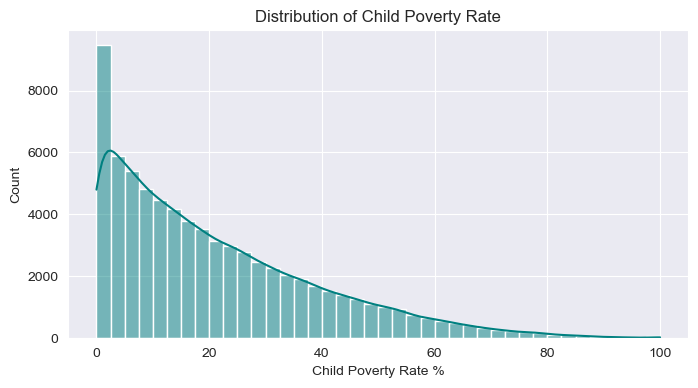

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

In [8]:
'''
Visualization of the child poverty rates.
Insight for determination of quantization thresholds and class sizes
'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

plt.figure(figsize=(8,4))
sns.histplot(df['ChildPoverty'], bins=40, kde=True, color='teal')
plt.title('Distribution of Child Poverty Rate')
plt.xlabel('Child Poverty Rate %')
plt.ylabel('Count')
plt.show()
df['ChildPoverty'].describe()


## Defining Quantization Boundaries

The quartiles are defined as:
 - 25% Q1: 6.2%
 - Median Q2: 16.3%
 - 75% Q3: 31.6%

We can convert the `ChildPoverty` into four ordinal classes using the quartile thresholds at the boundaries described above.
Using this approach we can achieve equal class sizes aligning with United States Poverty Metrics. Provided is a description of the class categories I will be creating for clarity:

 - Class 0 - Low-Poverty: (0 - 6.2%) Below first quartile (Affluent Areas), <10% of children living below poverty line(suburban / upper income)


 - Class 1 - Moderate Poverty: (6.2% - 16.3%) Lower Middle Region, Close to U.S. National Average of 17% 


 - Class 2 - High Poverty: (16.3% - 31.6%) Upper Middle Region, These regions align with areas eligible for Title 1 Community Development Block Grants


 - Class 3 - Severe Poverty: (31.6% or higher) Highest quartile, Tracts where 1 in 3 children live in poverty. These are special funding zones like Appalachian or Tribal Reservation areas.


 ### Test Split Balancing
 
The dataset will be split 80%/20% and stratified by class to make sure the class proportions are the same in both subsets.

<b>Only the training set will be balanced so the test set will still retain the actual data distribution to achieve reliable evaluation metrics.</b>
 

References:

U.S. Census Bureau. (2018). Income and Poverty in the United States: 2017 (Current Population Reports, P60-263). Washington, DC.

U.S. Department of Health & Human Services. (2017, January 31). Annual Update of the HHS Poverty Guidelines. Federal Register, 82(19). Retrieved from https://www.federalregister.gov/documents/2017/01/31/2017-02076/annual-update-of-the-hhs-poverty-guidelines

U.S. Department of Education. (2017). Title I, Part A — Improving the Academic Achievement of the Disadvantaged.

U.S. Department of Housing and Urban Development. (2017). Community Development Block Grant (CDBG) Program.

PovertyClass
0    18229
1    18171
2    18148
3    18170
Name: count, dtype: int64


/var/folders/nn/b5ldlxzd6q1_ckxvlqfb5q480000gn/T/ipykernel_43363/3853615541.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PovertyClass', data=df, palette='viridis')


Text(0, 0.5, 'Tracts')

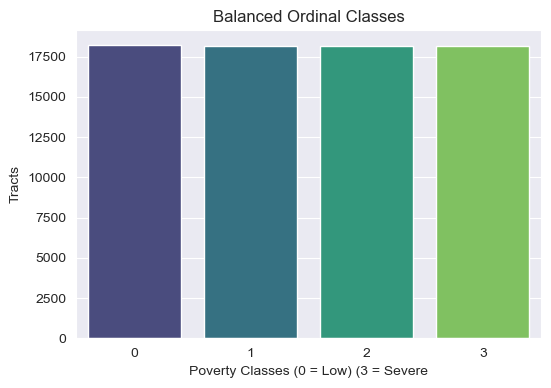

In [9]:
quartiles = [6.2, 16.3, 31.6]

def poverty_class(x):
    if x <= quartiles[0]:
        return 0
    elif x <= quartiles[1]:
        return 1
    elif x <= quartiles[2]:
        return 2
    else:
        return 3

df['PovertyClass'] = df['ChildPoverty'].apply(poverty_class)
print(df['PovertyClass'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='PovertyClass', data=df, palette='viridis')
plt.title('Balanced Ordinal Classes')
plt.xlabel('Poverty Classes (0 = Low) (3 = Severe')
plt.ylabel('Tracts')

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ChildPoverty', 'PovertyClass'])
y = df['PovertyClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

print('Training class distribution: ', y_train.value_counts(normalize=True).sort_index())
print('Test class distribution: ', y_test.value_counts(normalize=True).sort_index())


Training set size:  (58174, 34)
Test set size:  (14544, 34)
Training class distribution:  PovertyClass
0    0.250679
1    0.249888
2    0.249562
3    0.249871
Name: proportion, dtype: float64
Test class distribution:  PovertyClass
0    0.250688
1    0.249862
2    0.249587
3    0.249862
Name: proportion, dtype: float64


## Initial Modeling and Pre-Processing

In [105]:
import sys
from scipy.special import expit

'''
Base Two Layer Perceptron with the following:
(1) vectorized gradient computation 
(2) mini-batching
(3) cross entropy loss
(4) Glorot initialization
'''


class TLPMiniBatchCrossEntropy(object):
    def __init__(self, n_hidden=30, C=0.0, epochs=200, eta=0.01,
                 alpha=0.0, decrease_const=0.0, minibatches=1, shuffle=True,
                 random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha              
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T
    
    @staticmethod
    def _sigmoid(z):
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        return (lambda_ / 2.0) * (np.mean(W1 ** 2) + np.mean(W2 ** 2))
    '''
    (3) cross entropy loss
    '''
    def _cost(self, A3, Y_enc, W1, W2):
        ce = -np.mean(np.sum(Y_enc * np.log(A3 + 1e-9), axis=0))
        return ce + self._L2_reg(self.l2_C, W1, W2)
    
    def _feed_forward(self, X, W1, W2, b1, b2):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    """
    (1) vectorized gradient computation 
    """
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = (A3 - Y_enc)
        V1 = (W2.T @ V2) * (A2 * (1 - A2))
        m = A1.shape[1] # mini batch size to average the gradients
        
        gradW2 = (V2 @ A2.T) / m
        gradW1 = (V1 @ A1.T) / m
        gradb2 = np.mean(V2, axis=1, keepdims=True)
        gradb1 = np.mean(V1, axis=1, keepdims=True)
        
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        return gradW1, gradW2, gradb1, gradb2
    
    def _update_weight_params(self, eta, gradW1, gradW2, gradb1, gradb2):
        self.W1 -= eta * gradW1
        self.W2 -= eta * gradW2
        self.b1 -= eta * gradb1
        self.b2 -= eta * gradb2
        
    '''
    (2) mini-batching loop
    '''   
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._encode_labels(y)
        
        self.n_features = X.shape[1]
        self.n_outputs = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        self.cost_ = []
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3 = self._feed_forward(X_data[batch_idx], 
                                            self.W1, self.W2, self.b1, self.b2)
                
                cost = self._cost(A3, Y_enc[:, batch_idx], self.W1, self.W2)
                batch_costs.append(cost)
                
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1, A2, A3, Z1, Z2, Y_enc[:, batch_idx], self.W1, self.W2
                )
                self._update_weight_params(self.eta, gradW1, gradW2, gradb1, gradb2)
                
            self.cost_.append(np.mean(batch_costs))
        return self
    
    def predict(self, X):
        _, _, _, _, A3 = self._feed_forward(X, self.W1, self.W2, self.b1, self.b2)
        return np.argmax(A3, axis=0)
    
    
class TLPBetterInitial(TLPMiniBatchCrossEntropy):
    """
    (4) Glorot initialization
    """
    def _initialize_weights(self):
        limit1 = np.sqrt(6 / (self.n_features + self.n_hidden))
        limit2 = np.sqrt(6 / (self.n_hidden + self.n_outputs))
        W1 = np.random.uniform(-limit1, limit1, (self.n_hidden, self.n_features))
        W2 = np.random.uniform(-limit2, limit2, (self.n_outputs, self.n_hidden))
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_outputs, 1))
        return W1, W2, b1, b2        

### Model 1 - (No normalization or one-hot encoding)

In [106]:
# Model Training and Score Metrics
    
from sklearn.metrics import accuracy_score

params = dict(n_hidden=50, 
              C=0.0, 
              epochs=200, 
              eta=0.01,
              minibatches=max(1, int(len(y_train) / 256)),
              random_state=1
              )

nn_raw = TLPBetterInitial(**params)

# Disabling Momentum and Decay
nn_raw.alpha=0.0
nn_raw.decrease_const=0.0
nn_raw.shuffle=True

nn_raw.fit(X_train, y_train, print_progress=20)

# Compute accuracy
yhat_raw = nn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, yhat_raw)
print(f' Accuracy for Model 1 with raw features: {acc_raw:.4f}')

Epoch: 200/200 Accuracy for Model 1 with raw features: 0.2508


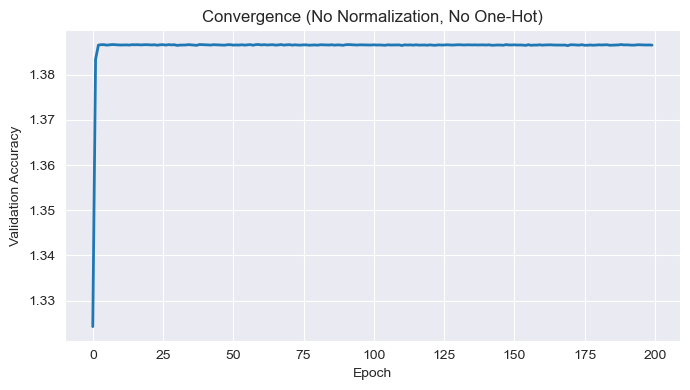

In [115]:
# loss function vs number of epochs on convergence
import matplotlib.pyplot as plt

raw_costs = [np.mean(c) for c in nn_raw.cost_]
plt.figure(figsize=(7,4))
plt.plot(raw_costs, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Convergence (No Normalization, No One-Hot)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Convergence Behavior without Normalization or One-Hot
The loss converge quickly, but I don't think I could say this model is learning. It seems it is collapsing into a local minimum caused by the unscaled features and the categorical variables not being one hot encoded. 

One conclusion I can come to is that the sigmoid activations get saturated early in the training, and the gradients become very small and optimization stops making progress after only a few epochs. The input data is poorly represented in the network. This also attributes to the low accuracy score.

### Model 2 - (normalizing continuous numeric feature data)

In [108]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=["float64", "float32", "int64"]).columns.tolist()

scaler = StandardScaler()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

X_train_normalized[numeric_cols] = scaler.fit_transform(X_train_normalized[numeric_cols])
X_test_normalized[numeric_cols] = scaler.transform(X_test_normalized[numeric_cols])

nn_normalized = TLPBetterInitial(
    n_hidden=50,
    C=0.0,
    epochs=200,
    eta=0.01,
    minibatches=max(1, int(len(y_train)/256)),
    random_state=1
)

nn_normalized.fit(X_train_normalized, y_test, print_progress=20)
yhat_normalize = nn_normalized.predict(X_test_normalized)
acc_normalized = accuracy_score(y_test, yhat_normalize)
print(f' Accuracy for Model 2 with normalized features: {acc_normalized:.4f}')


Epoch: 200/200 Accuracy for Model 2 with normalized features: 0.1700


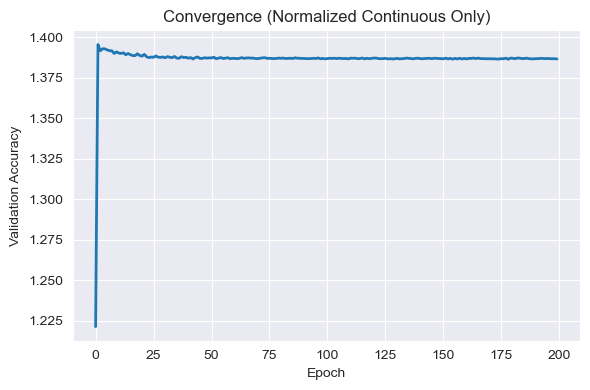

In [116]:
# Loss vs Epoch Convergence 

norm_costs = [np.mean(c) for c in nn_normalized.cost_]

plt.figure(figsize=(6,4))
plt.plot(norm_costs, label="Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Convergence (Normalized Continuous Only)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Convergence Behavior with Normalization Only

Model 2 performs worse than model 1 in convergence and accuracy. Normalization normally expected to improve gradient behavior, but it's the opposite in this case since it was used with taking care of the categorical variables. 

The categorical variables are still encoded as integers, so after normalization the values just become random floating point numbers that don't follow the natural categorical groupings. This also results in misdirected gradient flows that slows learning and increases cost variance. Essentially the model is confused and this shows that meaningful numeric structure is very important in neural networks. 

### Model 3 - (Normalization and One-Hot Encoding

Epoch: 200/200 Accuracy for Model 3 with Normalized + One-Hot Features: 0.2497


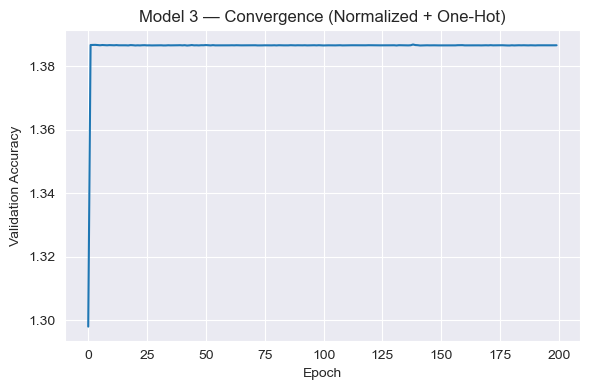

In [117]:
# one hot encoding

# Find the categorical and numeric columns again
numeric_cols_m3 = X_train.select_dtypes(include=["float64", "float32"]).columns.tolist()
categorical_cols = [c for c in X_train.columns if c not in numeric_cols_m3]


# Scaling
scaler_m3 = StandardScaler()
X_train_model_three = scaler_m3.fit_transform(X_train[numeric_cols_m3])
X_test_model_three = scaler_m3.transform(X_test[numeric_cols_m3])

# One Hot Encoding
X_train_oh = pd.get_dummies(X_train[categorical_cols], drop_first=False)
X_test_oh = pd.get_dummies(X_test[categorical_cols], drop_first=False)

# Combining train test matrices for new one hot values
X_train_oh, X_test_oh = X_train_oh.align(X_test_oh, join='left', axis=1, fill_value=0)

# Putting new scaler and one hot variables together. Avoiding matrix mismatches
X_train_m3 = np.hstack((X_train_model_three, X_train_oh.values))
X_test_m3 = np.hstack((X_test_model_three, X_test_oh.values))


nn_onehot = TLPBetterInitial(
    n_hidden=50,
    C=0.0,
    epochs=200,
    eta=0.01,
    minibatches=max(1, int(len(y_train)/256)),
    random_state=1
)

nn_onehot.fit(X_train_m3, y_train, print_progress=20)
yhat_m3 = nn_onehot.predict(X_test_m3)
acc_m3 = accuracy_score(y_test, yhat_m3)
print(f' Accuracy for Model 3 with Normalized + One-Hot Features: {acc_m3:.4f}')

full_costs = [np.mean(c) for c in nn_onehot.cost_]
plt.figure(figsize=(6,4))
plt.plot(nn_onehot.cost_)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Model 3 — Convergence (Normalized + One-Hot)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Convergence Behavior with Normalization and One-Hot
This model also converges quickly but still not evident of learning anything. Seems it is still meeting a local minimum and stopping learning yielding a 25% accuracy similar to just normalization being applied, the network probabilities seem to be exhibiting uniformity around the output classes. Maybe the network is just too small to handle the representative expansion brought on by the extra features created by the one-hot encoding. Preprocessing is not what is holding back accuracy or meaningful convergence, but model representative capacity. 

## Compare model performance

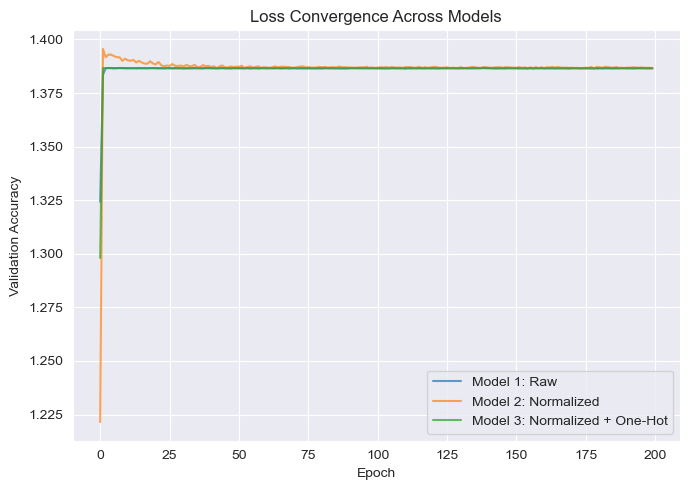

In [114]:
plt.figure(figsize=(7,5))
plt.plot(nn_raw.cost_, label="Model 1: Raw",alpha=0.7)
plt.plot(nn_normalized.cost_, label="Model 2: Normalized", alpha=0.7)
plt.plot(nn_onehot.cost_, label="Model 3: Normalized + One-Hot", alpha=0.7)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Loss Convergence Across Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| **Model** | **Preprocessing Applied** | **Accuracy** | **Convergence Behavior**                | **Observation**                                                                                |
|-----------|---------------------------|--------------|-----------------------------------------|------------------------------------------------------------------------------------------------|
| **Model 1** | No normalization, no one-hot encoding | 0.25%        | Converges almost immediately            | Network learns very little; categorical features are treated as numeric magnitudes             |
| **Model 2** | Normalized continuous features only | 0.17%        | Converges slower but still flattens early | Normalization helps gradient flow, but integer-encoded categorical variables still confuses inputs |
| **Model 3** | Normalized continuous + one-hot categorical | 0.25%        | Converges quickly similar to Model 1    | One-hot fixes encoding, but network still too small to separate the 4 poverty classes          |

All models converge but none of them exceed the 25% accuracy. Even after fixing feature representation with one-hot and normalization it seems a 2-layer network with just sigmoid activations does not improve accuracy which tells me that improvement may come from increasing network capacity by adding layers or adding adaptive learning techniques like AdaM or RMSProp

## Modeling

## 3-Layer Network

In [110]:
class TLPThreeLayer:
    
    def __init__(self,
                 n_hidden1=50,
                 n_hidden2=25,
                 C=0.0,               
                 epochs=200,
                 eta=0.01,            
                 minibatches=1,    
                 shuffle=True,
                 random_state=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.minibatches = max(1, int(minibatches))
        self.shuffle = shuffle
        
    @staticmethod
    def _sigmoid(z):
        return expit(z)

    @staticmethod
    def _onehot(y):
        return pd.get_dummies(y).values.T
    
    def _cost(self, A_out, Y_enc, W1, W2, W3):
        ce = -np.mean(np.sum(Y_enc * np.log(A_out + 1e-7), axis=0))
        # L2 norm added
        l2 = 0.0
        if self.l2_C > 0:
            l2 = self.l2_C * (np.mean(W1 ** 2) + np.mean(W2 ** 2) + np.mean(W3 ** 2))
        return ce + l2
    
    
    def _get_gradient(self, A1, A2, A3, A4, Y_enc, W1, W2, W3):
        m = A1.shape[1]   # batch size

        V3 = (A4 - Y_enc)                           # (k  x m)
        V2 = (W3.T @ V3) * (A3 * (1 - A3))          # (h2 x m)
        V1 = (W2.T @ V2) * (A2 * (1 - A2))          # (h1 x m)

        gradW3 = (V3 @ A3.T) / m
        gradW2 = (V2 @ A2.T) / m
        gradW1 = (V1 @ A1.T) / m

        gradb3 = np.mean(V3, axis=1, keepdims=True)
        gradb2 = np.mean(V2, axis=1, keepdims=True)
        gradb1 = np.mean(V1, axis=1, keepdims=True)

        if self.l2_C > 0:
            gradW3 += self.l2_C * W3
            gradW2 += self.l2_C * W2
            gradW1 += self.l2_C * W1

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    
    def _update_weight_params(self, gradW1, gradW2, gradW3, gradb1, gradb2, gradb3):
        self.W1 -= self.eta * gradW1
        self.W2 -= self.eta * gradW2
        self.W3 -= self.eta * gradW3
        self.b1 -= self.eta * gradb1
        self.b2 -= self.eta * gradb2
        self.b3 -= self.eta * gradb3
    
    # glorot helper to prevent repetition
    def _glorot(self, dim_in, dim_out):
        limit = np.sqrt(6.0 / (dim_in + dim_out))
        return np.random.uniform(-limit, limit, (dim_out, dim_in))
    
    def _initialize_weights(self, n_features, n_outputs):
        W1 = self._glorot(n_features, self.n_hidden1)
        W2 = self._glorot(self.n_hidden1, self.n_hidden2)
        W3 = self._glorot(self.n_hidden2, n_outputs) # added layer
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((n_outputs, 1))
        return W1, W2, W3, b1, b2, b3
    
    def _feed_forward(self, X, W1, W2, W3, b1, b2, b3):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._onehot(y_data)
        
        self.n_features = X_data.shape[1]
        self.n_outputs = Y_enc.shape[0]
        
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights(self.n_features,self.n_outputs)
        
        # Tracking the average gradient across layers for each epoch
        self.cost_ = []
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        
        
        # mini batching loop
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feed_forward(
                X_data[batch_idx], self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)

                cost = self._cost(A4, Y_enc[:, batch_idx], self.W1, self.W2, self.W3)
                
                batch_costs.append(cost)

                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(
                A1, A2, A3, A4, Y_enc[:, batch_idx], self.W1, self.W2, self.W3)
                
                self._update_weight_params(gradW1, gradW2, gradW3, gradb1, gradb2, gradb3)
                
            self.cost_.append(np.mean(batch_costs))
            self.grad_w1[epoch] = float(np.linalg.norm(gradW1))
            self.grad_w2[epoch] = float(np.linalg.norm(gradW2))
            self.grad_w3[epoch] = float(np.linalg.norm(gradW3))
            
        return self
    
    def predict(self, X):
        A1, Z1, A2, Z2, A3, Z3, A4 = self._feed_forward(
        X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        return np.argmax(A4, axis=0)      

In [118]:
nn3 = TLPThreeLayer(
    n_hidden1=50,
    n_hidden2=25,
    epochs=200,
    eta=0.01,
    minibatches=32,
    C=0.0,
    shuffle=True
)

nn3.fit(X_train, y_train, print_progress=20)

yhat_m4 = nn3.predict(X_test)
acc_m4 = accuracy_score(y_test, yhat_m4)
print(f"\nAccuracy for 3-layer Network: {acc_m4:.4f}")

Epoch: 200/200
Accuracy for 3-layer Network: 0.2601


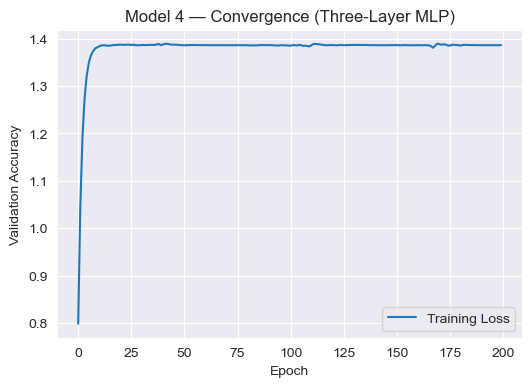

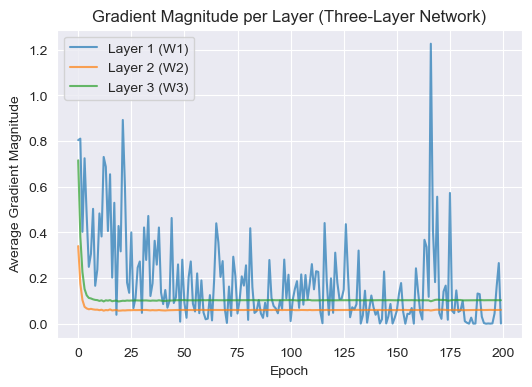

In [120]:
plt.figure(figsize=(6,4))
plt.plot(nn3.cost_, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Model 4 — Convergence (Three-Layer MLP)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(nn3.grad_w1, label="Layer 1 (W1)", alpha=0.7)
plt.plot(nn3.grad_w2, label="Layer 2 (W2)", alpha=0.7)
plt.plot(nn3.grad_w3, label="Layer 3 (W3)", alpha=0.7)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Magnitude per Layer (Three-Layer Network)")
plt.legend()
plt.grid(True)
plt.show()

## 4-Layer Network

In [127]:
class TLPFourLayer:
    
    def __init__(self,
                 n_hidden1=50,
                 n_hidden2=40,
                 n_hidden3=25,
                 C=0.0,               
                 epochs=200,
                 eta=0.01,            
                 minibatches=1,    
                 shuffle=True,
                 random_state=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.minibatches = max(1, int(minibatches))
        self.shuffle = shuffle
        
    @staticmethod
    def _sigmoid(z):
        return expit(z)

    @staticmethod
    def _onehot(y):
        return pd.get_dummies(y).values.T
    
    def _cost(self, A_out, Y_enc, W1, W2, W3, W4):
        ce = -np.mean(np.sum(Y_enc * np.log(A_out + 1e-7), axis=0))
        # L2 norm added
        l2 = 0.0
        if self.l2_C > 0:
            l2 = self.l2_C * (np.mean(W1 ** 2) + np.mean(W2 ** 2) + np.mean(W3 ** 2) + np.mean(W4**2))
        return ce + l2
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Y_enc, W1, W2, W3, W4):
        m = A1.shape[1]   # batch size

        V4 = (A5 - Y_enc)  
        V3 = (W4.T @ V4) * (A4 * (1 - A4))                          
        V2 = (W3.T @ V3) * (A3 * (1 - A3))          
        V1 = (W2.T @ V2) * (A2 * (1 - A2))         

        gradW4 = (V4 @ A4.T) / m
        gradW3 = (V3 @ A3.T) / m
        gradW2 = (V2 @ A2.T) / m
        gradW1 = (V1 @ A1.T) / m

        gradb4 = np.mean(V4, axis=1, keepdims=True)
        gradb3 = np.mean(V3, axis=1, keepdims=True)
        gradb2 = np.mean(V2, axis=1, keepdims=True)
        gradb1 = np.mean(V1, axis=1, keepdims=True)

        if self.l2_C > 0:
            gradW4 += self.l2_C * W4
            gradW3 += self.l2_C * W3
            gradW2 += self.l2_C * W2
            gradW1 += self.l2_C * W1

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    
    def _update_weight_params(self, gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4):
        self.W1 -= self.eta * gradW1
        self.W2 -= self.eta * gradW2
        self.W3 -= self.eta * gradW3
        self.W4 -= self.eta * gradW4
        self.b1 -= self.eta * gradb1
        self.b2 -= self.eta * gradb2
        self.b3 -= self.eta * gradb3
        self.b4 -= self.eta * gradb4
    
    # glorot helper to prevent repetition
    def _glorot(self, dim_in, dim_out):
        limit = np.sqrt(6.0 / (dim_in + dim_out))
        return np.random.uniform(-limit, limit, (dim_out, dim_in))
    
    def _initialize_weights(self, n_features, n_outputs):
        W1 = self._glorot(n_features, self.n_hidden1)
        W2 = self._glorot(self.n_hidden1, self.n_hidden2)
        W3 = self._glorot(self.n_hidden2, self.n_hidden3)
        W4 = self._glorot(self.n_hidden3, n_outputs)
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((n_outputs, 1))
        return W1, W2, W3, W4, b1, b2, b3, b4
    
    def _feed_forward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._onehot(y_data)
        
        self.n_features = X_data.shape[1]
        self.n_outputs = Y_enc.shape[0]
        
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights(self.n_features,self.n_outputs)
        
        # Tracking the average gradient across layers for each epoch
        self.cost_ = []
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)
        
        # mini batching loop
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feed_forward(
                X_data[batch_idx], self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)

                cost = self._cost(A5, Y_enc[:, batch_idx], self.W1, self.W2, self.W3, self.W4)
                
                batch_costs.append(cost)

                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                A1, A2, A3, A4, A5, Y_enc[:, batch_idx], self.W1, self.W2, self.W3, self.W4)
                
                self._update_weight_params(gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4)
                
            self.cost_.append(np.mean(batch_costs))
            self.grad_w1[epoch] = float(np.linalg.norm(gradW1))
            self.grad_w2[epoch] = float(np.linalg.norm(gradW2))
            self.grad_w3[epoch] = float(np.linalg.norm(gradW3))
            self.grad_w4[epoch] = float(np.linalg.norm(gradW4))
            
        return self
    
    def predict(self, X):
        A1, Z1, A2, Z2, A3, Z3, A4 , Z4, A5 = self._feed_forward(
        X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        return np.argmax(A5, axis=0)      

In [128]:
nn4 = TLPFourLayer(
    n_hidden1=50, n_hidden2=40, n_hidden3=25,
    C=0.001, epochs=200, eta=0.01,
    minibatches=32, shuffle=True, random_state=1
)
nn4.fit(X_train, y_train, print_progress=20)

yhat4 = nn4.predict(X_test)
acc4 = accuracy_score(y_test, yhat4)
print(f"Accuracy (4-layer): {acc4:.4f}")

Epoch: 200/200Accuracy (4-layer): 0.2689


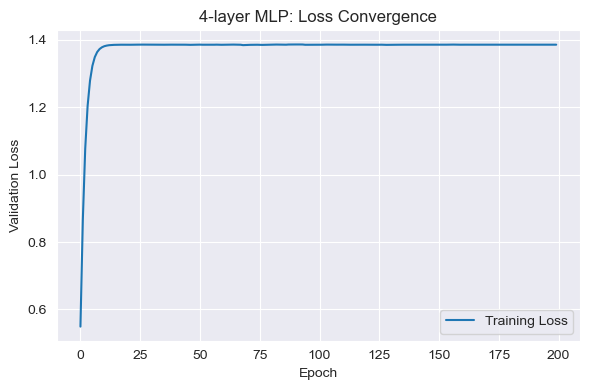

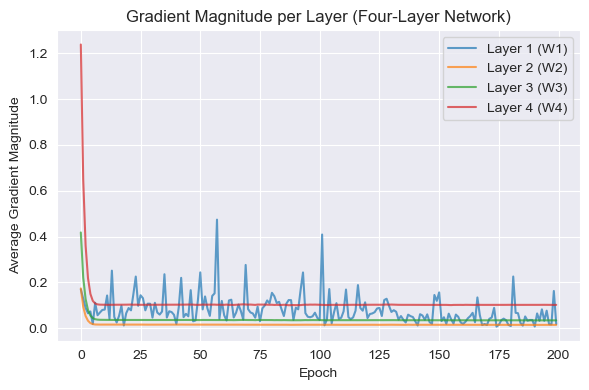

In [132]:
plt.figure(figsize=(6,4))
plt.plot(nn4.cost_, label="Training Loss")
plt.xlabel("Epoch"); plt.ylabel("Validation Loss")
plt.title("4-layer MLP: Loss Convergence")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(nn4.grad_w1, label="Layer 1 (W1)", alpha=0.7)
plt.plot(nn4.grad_w2, label="Layer 2 (W2)", alpha=0.7)
plt.plot(nn4.grad_w3, label="Layer 3 (W3)", alpha=0.7)
plt.plot(nn4.grad_w4, label="Layer 4 (W4)", alpha=0.7)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Magnitude per Layer (Four-Layer Network)")
plt.grid(True) 
plt.legend()
plt.tight_layout()
plt.show()

## 5-Layer Network

In [164]:
class TLPFiveLayer:
    
    def __init__(self,
                 n_hidden1=50,
                 n_hidden2=40,
                 n_hidden3=30,
                 n_hidden4=25,
                 C=0.0,               
                 epochs=200,
                 eta=0.01,            
                 minibatches=1,    
                 shuffle=True,
                 random_state=1):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.n_hidden4 = n_hidden4
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.minibatches = max(1, int(minibatches))
        self.shuffle = shuffle
        
    @staticmethod
    def _sigmoid(z):
        return expit(z)

    @staticmethod
    def _onehot(y):
        return pd.get_dummies(y).values.T
    
    def _cost(self, A_out, Y_enc, W1, W2, W3, W4, W5):
        ce = -np.mean(np.sum(Y_enc * np.log(A_out + 1e-7), axis=0))
        # L2 norm added
        l2 = 0.0
        if self.l2_C > 0:
            l2 = self.l2_C * (np.mean(W1 ** 2) + 
                              np.mean(W2 ** 2) + 
                              np.mean(W3 ** 2) + 
                              np.mean(W4 ** 2) +
                              np.mean(W5 ** 2))
        return ce + l2
    
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Y_enc, W1, W2, W3, W4, W5):
        m = A1.shape[1]   # batch size

        V5 = (A6 - Y_enc)
        V4 = (W5.T @ V5) * (A5 * (1 - A5))
        V3 = (W4.T @ V4) * (A4 * (1 - A4))
        V2 = (W3.T @ V3) * (A3 * (1 - A3))
        V1 = (W2.T @ V2) * (A2 * (1 - A2))         

        gradW5 = (V5 @ A5.T) / m
        gradW4 = (V4 @ A4.T) / m
        gradW3 = (V3 @ A3.T) / m
        gradW2 = (V2 @ A2.T) / m
        gradW1 = (V1 @ A1.T) / m

        gradb5 = np.mean(V5, axis=1, keepdims=True)
        gradb4 = np.mean(V4, axis=1, keepdims=True)
        gradb3 = np.mean(V3, axis=1, keepdims=True)
        gradb2 = np.mean(V2, axis=1, keepdims=True)
        gradb1 = np.mean(V1, axis=1, keepdims=True)

        if self.l2_C > 0:
            gradW5 += self.l2_C * W5
            gradW4 += self.l2_C * W4
            gradW3 += self.l2_C * W3
            gradW2 += self.l2_C * W2
            gradW1 += self.l2_C * W1


        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

    
    def _update_weight_params(self, gradW1, gradW2, gradW3, gradW4, gradW5,
                              gradb1, gradb2, gradb3, gradb4, gradb5):
        self.W1 -= self.eta * gradW1
        self.W2 -= self.eta * gradW2
        self.W3 -= self.eta * gradW3
        self.W4 -= self.eta * gradW4
        self.W5 -= self.eta * gradW5
        
        self.b1 -= self.eta * gradb1
        self.b2 -= self.eta * gradb2
        self.b3 -= self.eta * gradb3
        self.b4 -= self.eta * gradb4
        self.b5 -= self.eta * gradb5
    
    # glorot helper to prevent repetition
    def _glorot(self, dim_in, dim_out):
        limit = np.sqrt(6.0 / (dim_in + dim_out))
        return np.random.uniform(-limit, limit, (dim_out, dim_in))
    
    def _initialize_weights(self, n_features, n_outputs):
        W1 = self._glorot(n_features, self.n_hidden1)
        W2 = self._glorot(self.n_hidden1, self.n_hidden2)
        W3 = self._glorot(self.n_hidden2, self.n_hidden3)
        W4 = self._glorot(self.n_hidden3, self.n_hidden4)
        W5 = self._glorot(self.n_hidden4, n_outputs)
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_hidden4, 1))
        b5 = np.zeros((n_outputs, 1))
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    def _feed_forward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._onehot(y_data)
        
        self.n_features = X_data.shape[1]
        self.n_outputs = Y_enc.shape[0]
        
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights(self.n_features,self.n_outputs)
        
        
        # Tracking the average gradient across layers for each epoch
        self.cost_ = []
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)
        self.grad_w5 = np.zeros(self.epochs)
        
        # mini batching loop
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feed_forward(
                X_data[batch_idx], self.W1, self.W2, self.W3, self.W4, self.W5, 
                                   self.b1, self.b2, self.b3, self.b4, self.b5)

                cost = self._cost(A6, Y_enc[:, batch_idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                
                batch_costs.append(cost)

                (gradW1, gradW2, gradW3, gradW4, 
                 gradW5, gradb1, gradb2, gradb3, 
                 gradb4, gradb5) = self._get_gradient(A1, A2, A3, 
                                                      A4, A5, A6, 
                                                      Y_enc[:, batch_idx],
                                                      self.W1, self.W2, self.W3, 
                                                      self.W4, self.W5)
                
                self._update_weight_params(gradW1, gradW2, gradW3, 
                                           gradW4,gradW5, gradb1, gradb2, 
                                           gradb3, gradb4, gradb5)
                
                
            self.cost_.append(np.mean(batch_costs))
            self.grad_w1[epoch] = float(np.linalg.norm(gradW1))
            self.grad_w2[epoch] = float(np.linalg.norm(gradW2))
            self.grad_w3[epoch] = float(np.linalg.norm(gradW3))
            self.grad_w4[epoch] = float(np.linalg.norm(gradW4))
            self.grad_w4[epoch] = float(np.linalg.norm(gradW5))
            
        return self
    
    def predict(self, X):
        _, _, _, _, _, _, _, _, _, _, A6 = self._feed_forward(
            X, self.W1, self.W2, self.W3, self.W4, self.W5,
            self.b1, self.b2, self.b3, self.b4, self.b5
        )
        return np.argmax(A6, axis=0)      

In [165]:
nn5 = TLPFiveLayer(
    n_hidden1=50, n_hidden2=40, n_hidden3=25,
    C=0.001, epochs=200, eta=0.01,
    minibatches=32, shuffle=True, random_state=1
)
nn5.fit(X_train, y_train, print_progress=20)

yhat5 = nn5.predict(X_test)
acc5 = accuracy_score(y_test, yhat5)
print(f"Accuracy (5-layer): {acc5:.4f}")

Epoch: 200/200Accuracy (5-layer): 0.2773


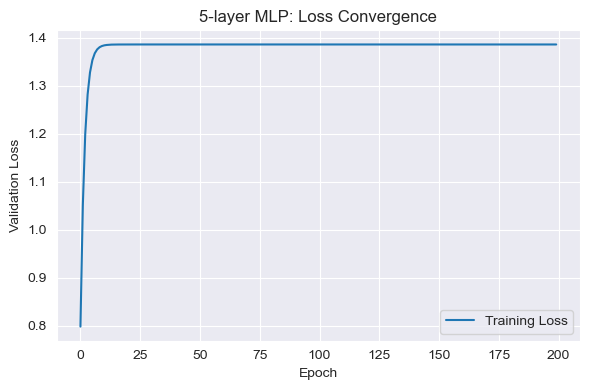

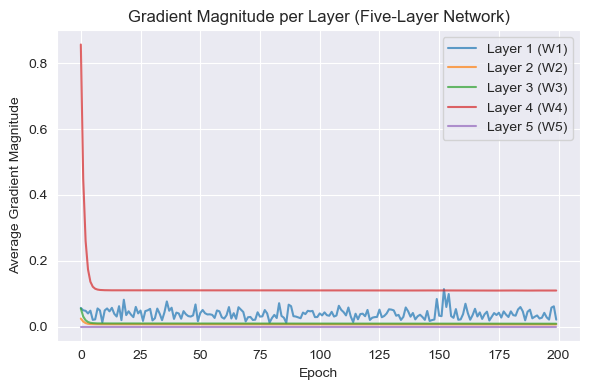

In [166]:
plt.figure(figsize=(6,4))
plt.plot(nn5.cost_, label="Training Loss")
plt.xlabel("Epoch") 
plt.ylabel("Validation Loss")
plt.title("5-layer MLP: Loss Convergence")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(nn5.grad_w1, label="Layer 1 (W1)", alpha=0.7)
plt.plot(nn5.grad_w2, label="Layer 2 (W2)", alpha=0.7)
plt.plot(nn5.grad_w3, label="Layer 3 (W3)", alpha=0.7)
plt.plot(nn5.grad_w4, label="Layer 4 (W4)", alpha=0.7)
plt.plot(nn5.grad_w5, label="Layer 5 (W5)", alpha=0.7)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Magnitude per Layer (Five-Layer Network)")
plt.grid(True) 
plt.legend()
plt.tight_layout()
plt.show()

## Network Performance Comparison (3, 4, and 5 Layers)

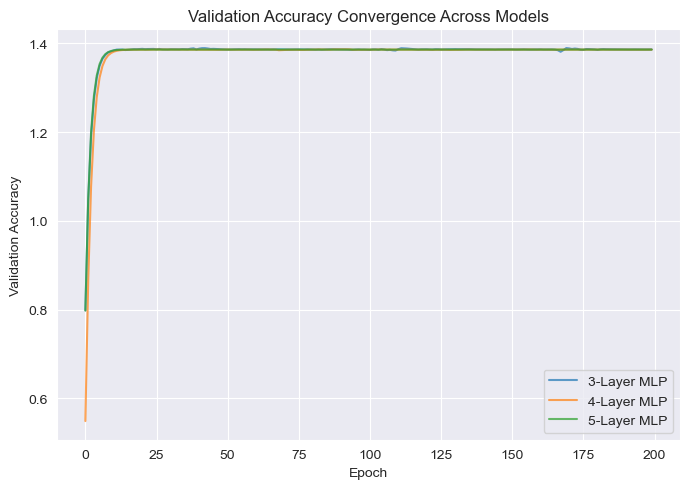

In [144]:
plt.figure(figsize=(7,5))
plt.plot(np.array(nn3.cost_), label="3-Layer MLP", alpha=0.7)
plt.plot(np.array(nn4.cost_), label="4-Layer MLP", alpha=0.7)
plt.plot(np.array(nn5.cost_), label="5-Layer MLP", alpha=0.7)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Convergence Across Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| Model | Hidden Layers | Accuracy | Observations                                                |
|--------|---------------|-------|-------------------------------------------------------------|
| 3-Layer MLP | 2 hidden layers total | 0.26 | Small improvement over 2-layer model |
| 4-Layer MLP | 3 hidden layers total | 0.27 | Small gain                                                  |
| 5-Layer MLP | 4 hidden layers total | 0.27 | No improvement even after adding more layers                |

Increasing the network depth didnt improve performance substantially. All the models remained close to the 25% accuracy baseline. So, the limiting factor isnt the model size but optimization or seperability of the features

**Convergence Behavior**

All models converged early even with adding more layers. Loss decreases smoothly but stops to a similar value for all models, which brings me to the conclusion that deeper networks don't get out of the plateau, but they do take slightly longer to flatten and converge. 

**Gradient Magnitude Analysis**

Later layers closer to the output have larger gradients while earlier layers have smaller, noiser gradients which seem to shrink as the network depth increased. This is caused by vanishing gradients by the sigmoid activations.

My overall conclusion is just increasing network depth alone doesn't increase accuracy. Adaptive optimization such as Adam or AdaDelta would help, as well as non saturating activations like ReLU.

## Adaptive Learning Algorithm: RMSProp

In [183]:
class TLPFiveLayerRMSProp(TLPFiveLayer):
    def __init__(self, *args, rho=0.9, eps=1e-8, **kwargs ):
        super().__init__(*args, **kwargs) # getting arguments from original 5-layer class
        self.rho = rho
        self.eps = eps
        
        
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._onehot(y_data)
        
        self.n_features = X_data.shape[1]
        self.n_outputs = Y_enc.shape[0]
        
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights(self.n_features,self.n_outputs)
        
      # RMSProp accumulator (running average of the squared gradients)
        # Replaces raw gradient updates in SGD
        square_avg_W1 = np.zeros(self.W1.shape); square_avg_b1 = np.zeros(self.b1.shape)
        square_avg_W2 = np.zeros(self.W2.shape); square_avg_b2 = np.zeros(self.b2.shape)
        square_avg_W3 = np.zeros(self.W3.shape); square_avg_b3 = np.zeros(self.b3.shape)
        square_avg_W4 = np.zeros(self.W4.shape); square_avg_b4 = np.zeros(self.b4.shape)
        square_avg_W5 = np.zeros(self.W5.shape); square_avg_b5 = np.zeros(self.b5.shape)
        
        # average gradient across layers
        self.cost_ = []
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)
        self.grad_w5 = np.zeros(self.epochs)
        
        # mini batching loop with RMSProp
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feed_forward(
                    X_data[batch_idx], self.W1, self.W2, self.W3,
                    self.W4, self.W5, self.b1, self.b2, self.b3, 
                    self.b4, self.b5
                )
                
                cost = self._cost(A6, Y_enc[:, batch_idx],self.W1, self.W2, self.W3, self.W4, self.W5)
                
                batch_costs.append(cost)

                (gradW1, gradW2, gradW3, gradW4, 
                 gradW5, gradb1, gradb2, gradb3, 
                 gradb4, gradb5) = self._get_gradient(A1, A2, A3, A4, A5, A6, 
                                                      Y_enc[:, batch_idx],
                                                      self.W1, self.W2, self.W3, 
                                                      self.W4, self.W5)
                
                # RMSProp gradient update
                for W, grad_weight, rms_cache in [(self.W1, gradW1, square_avg_W1), (self.W2, gradW2, square_avg_W2),
                                                  (self.W3, gradW3, square_avg_W3), (self.W4, gradW4, square_avg_W4),
                                                  (self.W5, gradW5, square_avg_W5)]:
                    
                    rms_cache[:] = self.rho * rms_cache + (1 - self.rho) * (grad_weight ** 2)
                    W[:] -= self.eta * grad_weight / (np.sqrt(rms_cache) + self.eps)
                    
                for B, bias_grad_weight, bias_rms_cache in [(self.b1, gradb1, square_avg_b1), (self.b2, gradb2, square_avg_b2),
                                                            (self.b3, gradb3, square_avg_b3), (self.b4, gradb4, square_avg_b4),
                                                            (self.b5, gradb5, square_avg_b5)]:
                    
                    bias_rms_cache[:] = self.rho * bias_rms_cache + (1 - self.rho) * (bias_grad_weight ** 2)
                    B[:] -= self.eta * bias_grad_weight / (np.sqrt(bias_rms_cache) + self.eps)
                
                
            self.cost_.append(np.mean(batch_costs))
            self.grad_w1[epoch] = float(np.linalg.norm(gradW1))
            self.grad_w2[epoch] = float(np.linalg.norm(gradW2))
            self.grad_w3[epoch] = float(np.linalg.norm(gradW3))
            self.grad_w4[epoch] = float(np.linalg.norm(gradW4))
            self.grad_w5[epoch] = float(np.linalg.norm(gradW5))
            
        return self

In [190]:
nn5_rms = TLPFiveLayerRMSProp(
    n_hidden1=80, n_hidden2=60, n_hidden3=40,
    C=0.0001, epochs=300, eta=0.005,
    minibatches=16, shuffle=True, random_state=1
)
nn5_rms.fit(X_train, y_train, print_progress=20)
yhat_rms = nn5_rms.predict(X_test)
acc_rms = accuracy_score(y_test, yhat_rms)
print(f" Accuracy (5-layer RMSProp): {acc_rms:.4f}")

Epoch: 300/300 Accuracy (5-layer RMSProp): 0.2496


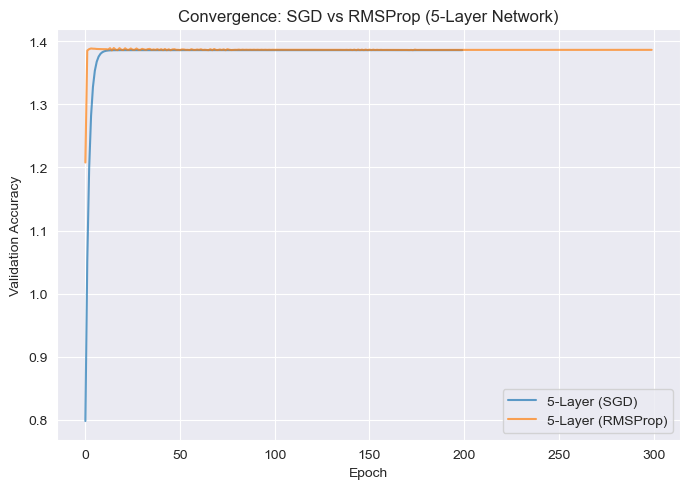

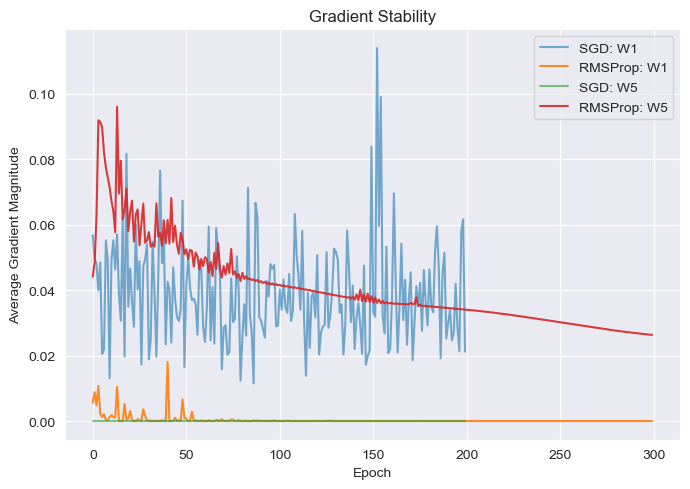

In [191]:
plt.figure(figsize=(7,5))
plt.plot(nn5.cost_, label="5-Layer (SGD)", alpha=0.7)
plt.plot(nn5_rms.cost_, label="5-Layer (RMSProp)", alpha=0.7)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Convergence: SGD vs RMSProp (5-Layer Network)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(nn5.grad_w1, label="SGD: W1", alpha=0.6)
plt.plot(nn5_rms.grad_w1, label="RMSProp: W1", alpha=0.9)
plt.plot(nn5.grad_w5, label="SGD: W5", alpha=0.6)
plt.plot(nn5_rms.grad_w5, label="RMSProp: W5", alpha=0.9)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Stability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Adaptive Method Description**

For the five-layer network I implemented the RMSProp as the adaptive learning method. I choose RMSProp because it is designed to stabilize training in deep networks where the gradients can vary significantly from layer to layer, works well with mini batching.

RMSProp maintains a running average of the squared gradients for each weight and scales the learning update step. This provides several advantages to the optimizer, first it reduces gradient oscillation in directions with a steep curvature and allow larger steps in flatter directions resulting faster convergence. Lastly, we also get automatic adaptive learning per gradient parameter rather than having to manually tune the learning rate.

The properties of this method fit well with the 5-layer network since we are just using sigmoid activations which are sensitive to vanishing gradients. This helps maintain stronger and more useful gradient signals than SGD.

**Performance with and without the adaptive learning strategy**

#### SGD Performance

I compared the gradient magnitudes of the first and last layers because they are representative of the extremes of the backpropagation flow. With SGD the gradients in the first layer collapse toward zero showing the vanishing gradient problem especially associated with SGD. The last layer using SGD just reached a magnitude of zero signaling that learning just stopped.

#### RMS Prop Performance

 Using RMSProp both layer gradients were kept small but non-zero by adaptively scaling the gradient updates which prevented the complete collapse experienced in SGD. So, RMSProp does stabilize the gradients but accuracy could still be increased however, using the sigmoid at every level might be the bottleneck in the model.

## AdaM Implementation 

In [199]:
class TLPFiveLayerAdam(TLPFiveLayer):
    
    """
    Reference: https://www.datacamp.com/tutorial/adam-optimizer-tutorial
    """
    def __init__(self, *args, beta1=0.9, beta2=0.999, eps=1e-8, **kwargs):
        super().__init__(*args, **kwargs)
        self.beta1 = beta1
        self.beta2 = beta2 
        self.eps = eps
        
        
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._onehot(y_data)

        self.n_features = X_data.shape[1]
        self.n_outputs = Y_enc.shape[0]

        (self.W1, self.W2, self.W3, self.W4, self.W5,
         self.b1, self.b2, self.b3, self.b4, self.b5) = self._initialize_weights(
            self.n_features, self.n_outputs)
        
        # Adam moments for weights and bias (Momentum Terms and Squared Gradient)
        momentum_W1 = np.zeros_like(self.W1); squared_grad_W1 = np.zeros_like(self.W1)
        momentum_W2 = np.zeros_like(self.W2); squared_grad_W2 = np.zeros_like(self.W2)
        momentum_W3 = np.zeros_like(self.W3); squared_grad_W3 = np.zeros_like(self.W3)
        momentum_W4 = np.zeros_like(self.W4); squared_grad_W4 = np.zeros_like(self.W4)
        momentum_W5 = np.zeros_like(self.W5); squared_grad_W5 = np.zeros_like(self.W5)

        momentum_bias1 = np.zeros_like(self.b1); squared_grad_bias1 = np.zeros_like(self.b1)
        momentum_bias2 = np.zeros_like(self.b2); squared_grad_bias2 = np.zeros_like(self.b2)
        momentum_bias3 = np.zeros_like(self.b3); squared_grad_bias3 = np.zeros_like(self.b3)
        momentum_bias4 = np.zeros_like(self.b4); squared_grad_bias4 = np.zeros_like(self.b4)
        momentum_bias5 = np.zeros_like(self.b5); squared_grad_bias5 = np.zeros_like(self.b5)
        
        self.cost_ = []
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)
        self.grad_w5 = np.zeros(self.epochs)
        
        bias_correction= 0 # Initialization of bias moment updates
        
        
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f"\rEpoch: {epoch+1}/{self.epochs}")
                sys.stdout.flush()

            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
                Y_enc = Y_enc[:, idx]

            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feed_forward(
                    X_data[batch_idx], self.W1, self.W2, self.W3,
                    self.W4, self.W5, self.b1, self.b2, self.b3,
                    self.b4, self.b5)
                
                cost = self._cost(A6, Y_enc[:, batch_idx],
                                  self.W1, self.W2, 
                                  self.W3, self.W4, 
                                  self.W5)
                
                batch_costs.append(cost)
                
                (gradW1, gradW2, gradW3, gradW4,
                 gradW5, gradb1, gradb2, gradb3,
                 gradb4, gradb5) = self._get_gradient(
                    A1, A2, A3, A4, A5, A6, Y_enc[:, batch_idx],
                    self.W1, self.W2, self.W3, self.W4, self.W5)
                
                # Adam parameter update
                bias_correction += 1 # correction step
                bias1_t = 1 - self.beta1 ** 2
                bias2_t = 1 - self.beta2 ** 2
                
                
                def adam(update_param, grad, moment, square_grad):
                    moment[:] = self.beta1 * moment + (1 - self.beta1) * grad
                    square_grad[:] = self.beta2 * square_grad + (1 - self.beta2) * (np.square(grad))
                    m_hat = moment / bias1_t
                    v_hat = square_grad / bias2_t
                    update_param[:] -= self.eta * m_hat / (np.sqrt(v_hat) + self.eps)
                    
                # update weights
                adam(self.W1, gradb1, momentum_W1, squared_grad_W1)
                adam(self.W2, gradb2, momentum_W2, squared_grad_W2)
                adam(self.W3, gradb3, momentum_W3, squared_grad_W3)
                adam(self.W4, gradb4, momentum_W4, squared_grad_W4)
                adam(self.W5, gradb5, momentum_W5, squared_grad_W5)
                
                # update biases
                adam(self.b1, gradb1, momentum_bias1, squared_grad_bias1)
                adam(self.b2, gradb2, momentum_bias2, squared_grad_bias2)
                adam(self.b3, gradb3, momentum_bias3, squared_grad_bias3)
                adam(self.b4, gradb4, momentum_bias4, squared_grad_bias4)
                adam(self.b5, gradb5, momentum_bias5, squared_grad_bias5)
                
            self.cost_.append(np.mean(batch_costs))
            self.grad_w1[epoch] = np.linalg.norm(gradW1)
            self.grad_w2[epoch] = np.linalg.norm(gradW2)
            self.grad_w3[epoch] = np.linalg.norm(gradW3)
            self.grad_w4[epoch] = np.linalg.norm(gradW4)
            self.grad_w5[epoch] = np.linalg.norm(gradW5)
        return self

In [196]:
nn5_adam = TLPFiveLayerAdam(
    n_hidden1=50, n_hidden2=40, n_hidden3=25,
    C=0.001, epochs=200, eta=0.001,
    minibatches=32, shuffle=True, random_state=1
)

nn5_adam.fit(X_train, y_train, print_progress=20)
yhat_adam = nn5_adam.predict(X_test)
acc_adam = accuracy_score(y_test, yhat_adam)

print(f" Accuracy (5-layer Adam): {acc_adam:.4f}")

Epoch: 200/200 Accuracy (5-layer Adam): 0.3574


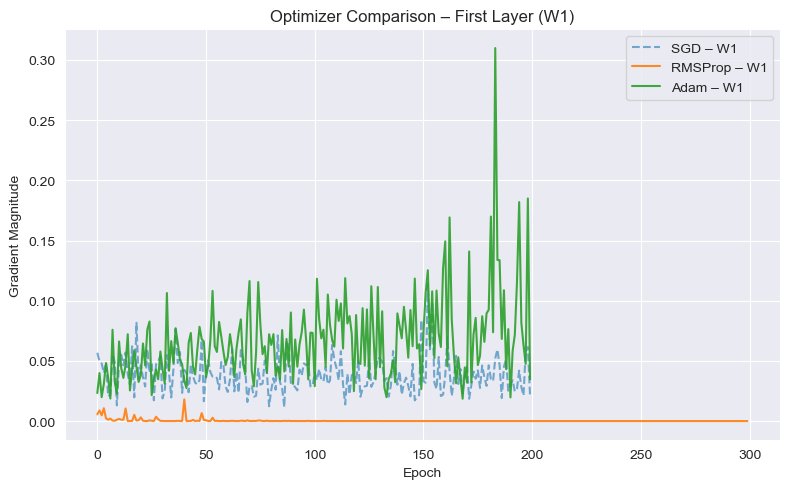

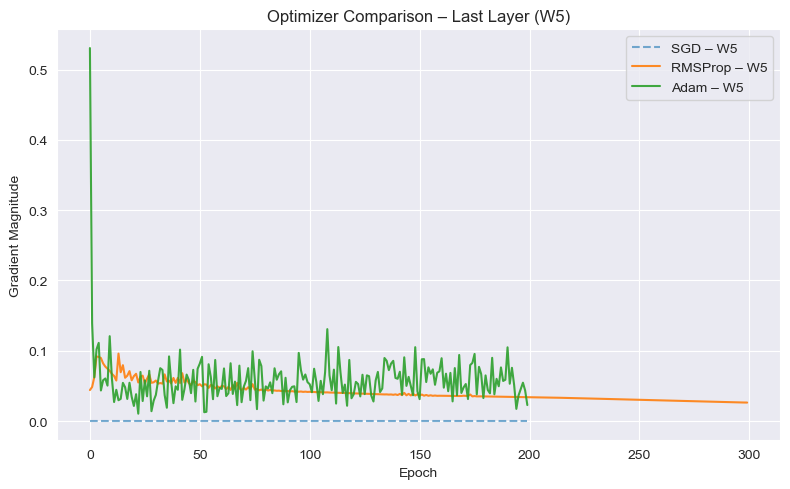

In [197]:
plt.figure(figsize=(8,5))
plt.plot(nn5.grad_w1, label="SGD: W1", alpha=0.6, linestyle="--")
plt.plot(nn5_rms.grad_w1, label="RMSProp: W1", alpha=0.9)
plt.plot(nn5_adam.grad_w1,label="Adam: W1", alpha=0.9)
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.title("Optimizer Comparison: First Layer (W1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(nn5.grad_w5, label="SGD: W5", alpha=0.6, linestyle="--")
plt.plot(nn5_rms.grad_w5, label="RMSProp: W5", alpha=0.9)
plt.plot(nn5_adam.grad_w5,label="Adam: W5", alpha=0.9)
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.title("Optimizer Comparison – Last Layer (W5)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Performance of Adam Gradient optimizer**

Adam produced the most stable gradient behavior which translated to the highest accuracy so far at 38%. Adam had a higher initial gradient meaning there was faster propagation in earlier epochs. Also, there was smoother gradient decay instead of the sudden collapse in the later layers which allow better, more continuous learning. 

The take-away I can conclude from this is that even though Adam solved the gradient issues the architecture could still be improved with adding ReLU activation deeper in the network or using more layers/normalization.